# preprocessing

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('./webinarstuff.csv')

In [8]:
kamus_kategori = {
    'teknologi':('it', 'startup', 'web-development', 'big-data-analytic','programming','ui-ux','design-thinking',
                'mobile-apps', 'analytics','teknologi','hardware'), 
    'fashion':('fashion','fashionpreneur', 'sewing-menjahit', 'crochet-knitting-weaving','jewelry-making',
              'fashion-accessories','beauty'), 
    'art':('watercolor', 'photograph-videography', 'clay-creamic', 'calligraphy-and-lettering','calipgraphy',
          'flowers', 'drawing','painting-watercolor', 'craft', 'digital-imaging', 'design-media','art',
          'watercolor','bookbinding','caligraphy','fashion-illustration','videography','photography-videography',
          'screen-printing','clay-ceramic','pattern-design'), 
    'business':('business', 'business-bisnis', 'digitalmarketing', 'finance', 'presentation', 'content-creator', 
               'social-media', 'digital-marketing', 'instagram-marketing', 'business-career-upgrade', 'marketing', 
               'communication-writing', 'entrepreneurship-startup', 'facebook-marketing', 'accounting',
                'business-product-development', 'creative-writing-menulis', 'sales', 'spreadsheet','investment',
               'entrepreneurs', 'foodpreneurs', 'branding' 'hr', 'sem-seo', 'branding','business-research-report-writing',
               ' top-selling','customer-service','management','content-writing','body-care-soap-lotion-shampoo','top-selling',
               'hr'),
    'pengembangan-diri':('self-help','persiapan-tes','prakerja','personaldevelopment','kariermu',
                         'bored-on-the-weekend','baking-bikin-kue', 'personal-development', 'personal-communication',
                        'public-speaking', 'language', 'beauty', 'baking','cooking-baking', 'leadership',
                        'office-productivity', 'health-wellness', 'homeliving', 'cooking', 'cooking-masak',
                        'homeliving', 'cake-pastry-dessert','beverage','soap-making', 'japanese', 
                        'healthy-food','clay-ceramig','coffee','hospitality', 'healthwellness', 'book-binding',
                        'papercraft','dessert-making','personal-finance','inilah-beberapa-hobi-yang-bisa-menghasilkan',
                        'workshop','home-living','english','lifestyle','maubelajarapa.com','sport-and-fitness',
                        'fnb-hospitality','where-to-start')
}
def categorize(s):
    for k,v in kamus_kategori.items(): 
        if s.lower in v: 
            return k

In [9]:
df


,sumber,judul,bidang,kategori
0,mau belajar apa,(10 Sessions) Learn The Essentials of Graphic ...,digital-imaging,art
1,mau belajar apa,(3 Sessions) Learn about Introduction to 3D Mo...,digital-imaging,art
2,mau belajar apa,(4 Sessions) Learn How To Create Creature Design,digital-imaging,art
3,mau belajar apa,Belajar Keterampilan Desain Grafis Bersama Wah...,digital-imaging,art
4,mau belajar apa,(3 Sessions) Belajar Photoshop Melalui Pembuat...,digital-imaging,art
...,...,...,...,...
1229,mau belajar apa,(Livestream) Learn How Big Data And AI Can Hel...,big-data-analytic,teknologi
1230,mau belajar apa,(39 Sessions) (Regular Class) Learn All About ...,big-data-analytic,teknologi
1231,mau belajar apa,(30 Sessions) Learn All About Machine Learning...,big-data-analytic,teknologi
1232,mau belajar apa,(14 Sessions) Learn All About Data Visualizati...,big-data-analytic,teknologi


In [4]:
kategori = []
for bid in df['bidang']: 
    hasil = []
    for k,v in kamus_kategori.items():
        if bid.strip().lower() in v: 
            hasil.append(k)
    kategori.append(hasil)

KeyError: 'bidang'

In [ ]:
fix_kategori=[]
for k in kategori: 
    if k: 
        fix_kategori.append(k[0])
    else: 
        fix_kategori.append('None')

In [ ]:
df['kategori'] = fix_kategori

In [10]:
df.to_csv('hasil_23-04-2020.csv', index=False)

# word count

In [11]:
import pandas as pd
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt

df = pd.read_csv('./hasil_23-04-2020.csv')

In [12]:
import itertools
import collections
def ngrams(words, n):
    hasil = []
    d = collections.deque(maxlen=n)
    d.extend(words[:n])
    words = words[n:]
    for window, word in zip(itertools.cycle((d,)), words):
        hasil.append(' '.join(window))
        d.append(word)
    return hasil

In [13]:
judul_all = df['judul'].values

In [14]:
token_judul = [simple_preprocess(a) for a in judul_all]
token_judul_clean = [c for a in token_judul for c in a]

## removing stopwords

In [15]:
STOPWORDS = set(open('./stopwords.txt').read().splitlines())

def remove(s): 
    if s not in STOPWORDS: 
        return s
clean = [remove(s) for s in token_judul_clean if remove(s)]


token_judul_train = []   
for tok_list in token_judul: 
    temp = []
    for token in tok_list: 
        if token not in STOPWORDS: 
            temp.append(token)
    token_judul_train.append(' '.join(temp))

## ngrams

In [16]:
a = ngrams(clean,2)
bc = collections.Counter(a)
grams_2 = bc.most_common(15)

<BarContainer object of 15 artists>

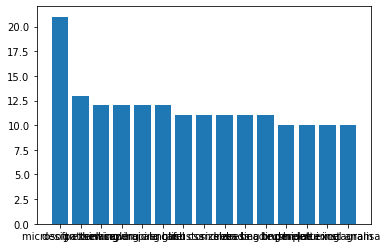

In [17]:
plt.bar([x[0] for x in grams_2], [x[1] for x in grams_2])

In [18]:
grams_2

[('microsoft excel', 21),
 ('design thinking', 13),
 ('pattern sewing', 12),
 ('sewing draping', 12),
 ('academic english', 12),
 ('ala cafe', 12),
 ('html css', 11),
 ('custom size', 11),
 ('size dress', 11),
 ('dress beading', 11),
 ('beading technique', 11),
 ('brush pen', 10),
 ('pen lettering', 10),
 ('melalui instagram', 10),
 ('excel analisa', 10)]

## tfidf

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

# fit_transform on training data
X_traintfidf = tfidf.fit_transform(token_judul_train)
terms = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = X_traintfidf.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','score'])
ranking.sort_values('score', ascending=False)

,term,score
149,business,20.626235
589,marketing,16.529060
238,design,14.870616
229,data,13.627696
406,instagram,13.314262
...,...,...
717,oleh,0.366139
514,kondang,0.366139
85,banyak,0.366139
495,kerjaan,0.366139


In [20]:
ranking.sort_values('score', ascending=False).to_csv('ranking_words.csv', index=False)

In [ ]:
token_judul_clean[:10]

In [8]:
c = collections.Counter(token_judul_train)

In [9]:
c.most_common(10)

[('bakery minim', 10),
 ('writing business', 10),
 ('jualan iklan instagram albert leonardo beginner', 9),
 ('microsoft excel analisa data', 9),
 ('seo', 9),
 ('menulis', 8),
 ('apply shibori shirt', 8),
 ('geografi', 8),
 ('bow tie dress', 7),
 ('futuristic cropped jacket', 7)]

# top2vec 

In [21]:
token_judul_train[:5]


['essentials graphic design imaging',
 'modelling',
 'create creature design',
 'keterampilan desain grafis bersama wahyu studio',
 'photoshop melalui pembuatan poster modern']

In [22]:
from top2vec import Top2Vec

model = Top2Vec(token_judul_train, speed='deep-learn', workers=8)
# model = Top2Vec.load('top_class.model')

Exception in thread Thread-22:
Traceback (most recent call last):
  File "/Users/svmihar/miniconda/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Users/svmihar/miniconda/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/svmihar/miniconda/lib/python3.7/site-packages/gensim/models/base_any2vec.py", line 211, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, job_parameters, thread_private_mem)
  File "/Users/svmihar/miniconda/lib/python3.7/site-packages/gensim/models/doc2vec.py", line 721, in _do_train_job
    doctag_vectors=doctag_vectors, doctag_locks=doctag_locks
  File "gensim/models/doc2vec_inner.pyx", line 349, in gensim.models.doc2vec_inner.train_document_dbow
TypeError: Cannot convert list to numpy.ndarray



KeyboardInterrupt: 

In [ ]:
model.save('top_class.model')

In [13]:
model.get_num_topics()

4

In [14]:
topic_words, word_scores, topic_nums = model.get_topics(4)

print(topic_words, word_scores, topic_nums)

[['bisnis', 'business'], ['bisnis', 'business'], ['business', 'bisnis'], ['bisnis', 'business']] [[0.0784, -0.1254], [-0.0791, -0.0917], [0.0126, -0.0061], [0.0304, -0.0812]] [0, 1, 2, 3]


In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes

In [ ]:
topic_nums